# Stochastic differential equation with OU noise.

***

We will solve the equation, $$\dot{x}=-ax+\sqrt{D}g(x)\zeta_{OU}(t)$$ with exact generation of $g_{h},$ for $a=2$ and $D=0.05$ using Heun method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [4]:
def q(t,x,a=2):
  return -a*x

def g(t,x,D=0.05):
  return np.sqrt(D)*x

def gx1(t,x,D=0.05):
  return np.sqrt(D)

In [5]:
def sHeun(q,g,gh0, a_old, b_old):

    tpoints = np.arange(0,5.1,h)
    xpoints = []

    x = 1.0

    for t in tpoints:
        xpoints.append(x)

        u = np.random.normal(0, 1)
        v = np.random.normal(0, 1)
        a = np.sqrt(h) * u
        b = beta * u + gamma * v
        ghnew = p*(gh0-a_old) + a - b_old + b

        k = h*q(t,x) +ghnew*g(t,x)

        x += h/2*(q(t,x)+q(t+h,x+k))+ghnew/2*(g(t,x)+g(t+h,x+k))
        
        a_old = a
        b_old = b
        gh0 = ghnew
    return tpoints,xpoints

In [6]:
tau = 0.5
h = 0.01
u = np.random.normal(0, 1)
v = np.random.normal(0, 1)
a = np.sqrt(h) * u
p = np.exp(-h/tau)
beta = tau * (p - 1) / np.sqrt(h)
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)
b = beta * u + gamma * v

gh0 = np.sqrt(tau/2) * (1 - p) * u + a + b

In [7]:
def ntraj(n):
  timeList=[]
  trajList=[]
  for iiter in range(n):
    tm,sp=sHeun(q,gx1,gh0, a, b)
    timeList.append(tm)
    trajList.append(sp)
  return timeList, trajList

## Trajectories:
For $g(x)=1$ and $\tau=0.005,0.05,0.5,2$ , 10 trajectories are plotted with initial condition $x(0)=1.0$ and $h=0.01$

In [8]:
tauList=[0.005,0.05,0.5,2]
dicTau={}
for tau in tauList:
  h = 0.01
  u = np.random.normal(0, 1)
  v = np.random.normal(0, 1)
  a = np.sqrt(h) * u
  p = np.exp(-h/tau)
  beta = tau * (p - 1) / np.sqrt(h)
  gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)
  b = beta * u + gamma * v

  gh0 = np.sqrt(tau/2) * (1 - p) * u + a + b
  time,space=ntraj(10)
  dicTau[tau]=[time,space]


[Text(0.5, 0, '$t$'), Text(0.5, 1.0, '2')]

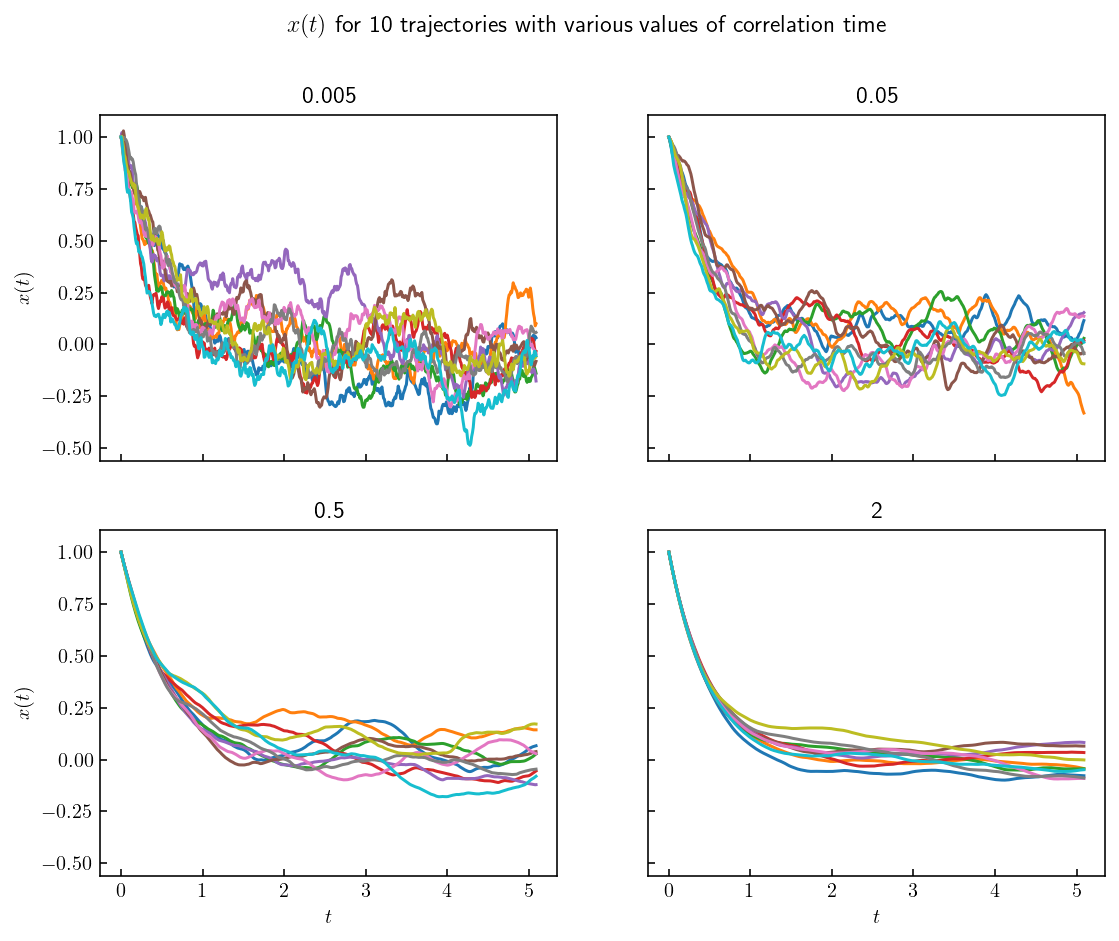

In [9]:
fig,ax=plt.subplots(2,2,figsize=(9,7),sharex=True,sharey=True)
tau=0.005
for i in range(10):
  ax[0,0].plot(dicTau[tau][0][i],dicTau[tau][1][i])
tau=0.05
for i in range(10):
  ax[0,1].plot(dicTau[tau][0][i],dicTau[tau][1][i])
tau=0.5
for i in range(10):
  ax[1,0].plot(dicTau[tau][0][i],dicTau[tau][1][i])
tau=2
for i in range(10):
  ax[1,1].plot(dicTau[tau][0][i],dicTau[tau][1][i])
plt.suptitle('$x(t)$ for 10 trajectories with various values of correlation time')
ax[0,0].set(ylabel='$x(t)$',title=0.005)
ax[0,1].set(title=0.05)
ax[1,0].set(xlabel='$t$',ylabel='$x(t)$',title=0.5)
ax[1,1].set(xlabel='$t$',title=2)

As the correlation time $\tau$ is increased, the fluctuations get reduced, and the trajectories moves towards the deterministic ones. This is the consequence of the fact that as $\tau\rightarrow0$ the Orstein-Uhlenbeck noise maps to the the Gaussian white noise.

##  Correlation:
For the same value of $g(x)$​=1, the correlation function $C(t,s)=<x(t)x(t+s)>_{{\rm 1000}\,{\rm trajectories}}$​ is plotted for $t=0.5,1,2,5$.

In [10]:
h = 0.01
u = np.random.normal(0, 1)
v = np.random.normal(0, 1)
a = np.sqrt(h) * u
tau=0.5
p = np.exp(-h/tau)
beta = tau * (p - 1) / np.sqrt(h)
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)
b = beta * u + gamma * v

gh0 = np.sqrt(tau/2) * (1 - p) * u + a + b
time,traj1000=ntraj(1000)

In [11]:
tlist=[0.5,1.0,2.0,5.0]
slist=np.arange(0,5.1,0.01)
dic={}
timet=np.around(time[0],2)
for tm in tlist:
  cst=[]
  idt=timet.tolist().index(tm)
  for s in slist[:len(slist)-idt:50]:
    s=np.around(s,2)
    ids=timet.tolist().index(s)
    ans=[traj1000[i][idt]*traj1000[i][idt+ids] for i in range(len(traj1000))]
    cst.append(np.mean(ans))
    dic[tm]=cst

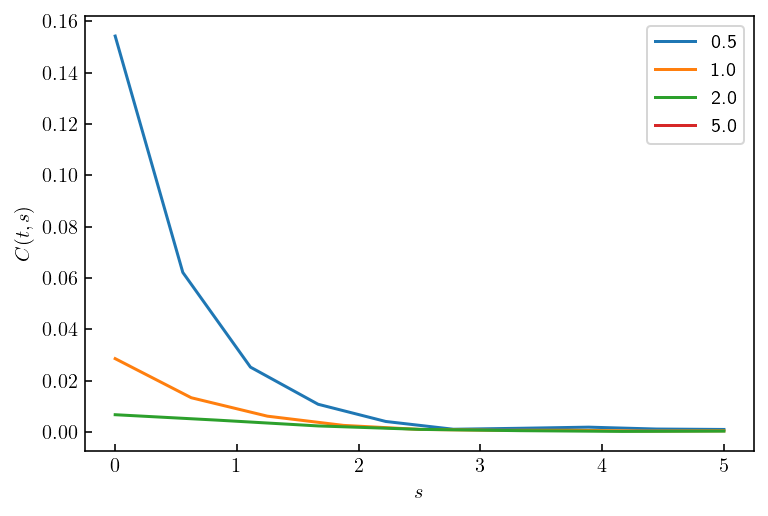

In [12]:
for tm in tlist:
  plt.plot(np.linspace(0,5,len(dic[tm])),dic[tm],label=tm)
plt.ylabel('$C(t,s)$')
plt.xlabel('$s$')
plt.legend()

The correlation function approaches to zero after t=2, that corresponds to the stationary regime. The correlation time for which the correlation decays as $1/e$ is $\approx$ 0.55.

## Effect of the noise correlation time:
Here we plot the same function, as above, for $\tau=0.05,0.5,2$​​​​ .

In [13]:
tauList=[0.05,0.5,2.0]
dicTau={}
for tau in tauList:
  h = 0.01
  u = np.random.normal(0, 1)
  v = np.random.normal(0, 1)
  a = np.sqrt(h) * u
  p = np.exp(-h/tau)
  beta = tau * (p - 1) / np.sqrt(h)
  gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)
  b = beta * u + gamma * v

  gh0 = np.sqrt(tau/2) * (1 - p) * u + a + b
  time,space=ntraj(1000)
  dicTau[tau]=[time,space]

In [14]:
tlist=[0.5,1.0,2.0,5.0]
slist=np.arange(0,5.1,0.05)
allTau={}
for tau in tauList:
  dic={}
  timet=np.around(dicTau[tau][0][0],2)
  for tm in tlist:
    cst=[]
    idt=timet.tolist().index(tm)
    for s in slist:
      s=np.around(s,2)
      ids=timet.tolist().index(s)
      ans=[dicTau[tau][1][i][idt]*dicTau[tau][1][i][ids] for i in range(len(traj1000))]
      cst.append(np.mean(ans))
      dic[tm]=cst
  allTau[tau]=dic

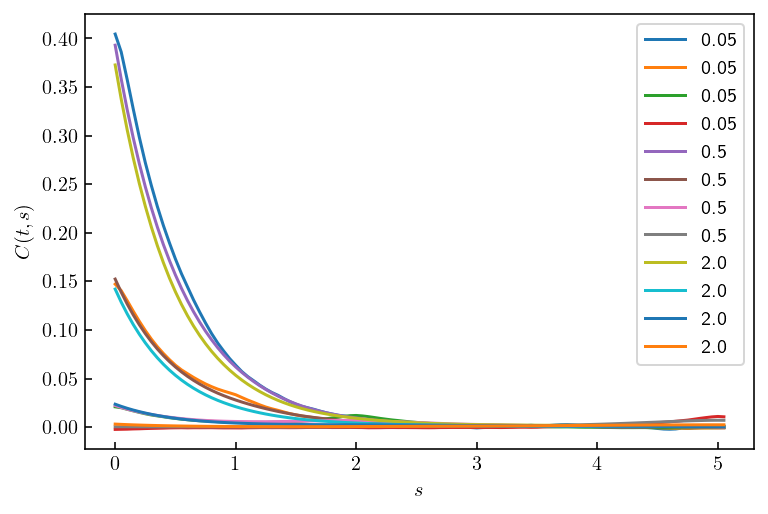

In [15]:
fig,ax=plt.subplots()
for tau in tauList:
  for tm in tlist:
    plt.plot(slist,allTau[tau][tm],label=tau)
  ax.set_label(tau)
plt.ylabel('$C(t,s)$')
plt.xlabel('$s$')
plt.legend()

The plot shows that, for higher values of $\tau$, only decrease the starting point of the correlation function but has no effect on the stationary regime, that is always attained for t $\ge$ 2.

## Multiplicative noise:
Now for $g(x)=x$​ and $\tau=0.5$​​​ , 10 trajectories are plotted for the same values as before.

In [16]:
def ntrajx(n):
  timeList=[]
  trajList=[]
  for iiter in range(n):
    tm,sp=sHeun(q,g,gh0, a, b)
    timeList.append(tm)
    trajList.append(sp)
  return timeList, trajList

In [17]:
h = 0.01
tau=0.5
u = np.random.normal(0, 1)
v = np.random.normal(0, 1)
a = np.sqrt(h) * u
p = np.exp(-h/tau)
beta = tau * (p - 1) / np.sqrt(h)
gamma = np.sqrt(tau/2 * (1 - p**2) - beta**2)
b = beta * u + gamma * v

gh0 = np.sqrt(tau/2) * (1 - p) * u + a + b
time,space=ntrajx(10)

Text(0.5, 0, '$t$')

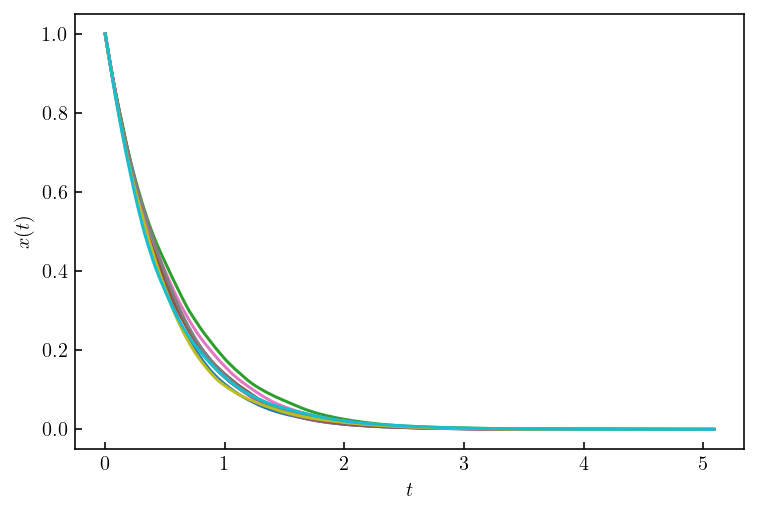

In [18]:
for i in range(10):
  plt.plot(time[i],space[i])
plt.ylabel('$x(t)$')
plt.xlabel('$t$')

***